# UAS DATA MINING

### NIM : 2103842
### Nama : Dicki Fathurohman
### Kelas : Ilmu Komputer C2 - 2021

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_ipm = pd.read_csv("https://raw.githubusercontent.com/dickifathurohman/2103842-UAS-DATMIN/main/Dataset/pmi.csv")

data_pangan = pd.read_csv("https://raw.githubusercontent.com/dickifathurohman/2103842-UAS-DATMIN/main/Dataset/ketidak_cukupan_pangan_prov.csv")

data_huruf = pd.read_csv("https://raw.githubusercontent.com/dickifathurohman/2103842-UAS-DATMIN/main/Dataset/melek_huruf_diatas15.csv")

data_rumah = pd.read_csv("https://raw.githubusercontent.com/dickifathurohman/2103842-UAS-DATMIN/main/Dataset/persen_rumah_menyewa.csv")

data_kalori = pd.read_csv("https://raw.githubusercontent.com/dickifathurohman/2103842-UAS-DATMIN/main/Dataset/persen_asupan_kalori_bawah_1400.csv")

Untuk mengukur tingkat IPM akan digunakan data mengenai:
- persentasi kecukupan pangan : karena salah satu standar hidup yang layak dan hidup sehat yaitu adanya kebutuhan pangan yang terpenuhi
- data melek huruf : Banyaknya masyarakat yang dapat membaca menandakan baiknya juga pendidikan yang berada pada daerah tersebut
- data sewa rumah : Banyaknya masyarakat yang masih mengontrak atau menyewa rumah menandakan bahwa daerah tersebut masih kurang tinkat kesejahteraannya
- persen kalori : Sama seperti kebutuhan pangan, data persen asupan kalori ini dapat digunakan untuk mengukur kelayakan hidup berdasarkan asupan gizi


In [2]:
#gabungkan data
data_merge = pd.merge(data_pangan, data_rumah, how='left', on=["tahun", "prov"])

data_merge = pd.merge(data_merge, data_huruf, how='left', on=["tahun", "prov"])

data_merge = pd.merge(data_merge, data_kalori, how='left', on=["tahun", "prov"])

#data_merge = pd.merge(data_merge, data_pmi, how='left', on=["tahun", "prov"])

# EDA / Visualisasi Data

<AxesSubplot:xlabel='tahun', ylabel='count'>

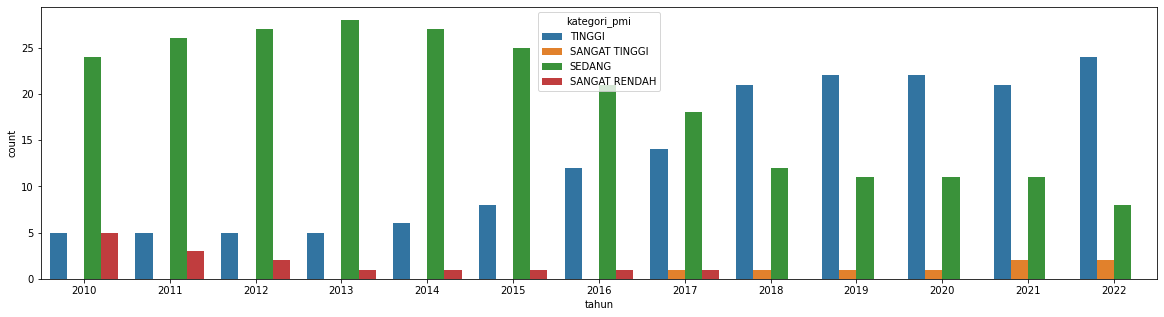

In [3]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(ax=ax, x="tahun", hue="kategori_pmi", data=data_ipm)

Pada countplot diatas, dapat dilihat bahwa tiap tahunnya ada peningkatan angka PMI. Pada tahun 2017 dan sebelumnya masih ada provinsi dengan kategori PMI yang sangat rendah. Namun pada tahun 2018 keatas, sudah tidak ada lagi provinsi dengan kategori PMI sangat rendah, dan bahkan beberapa provinsi dikategorikan sangat tinggi. 

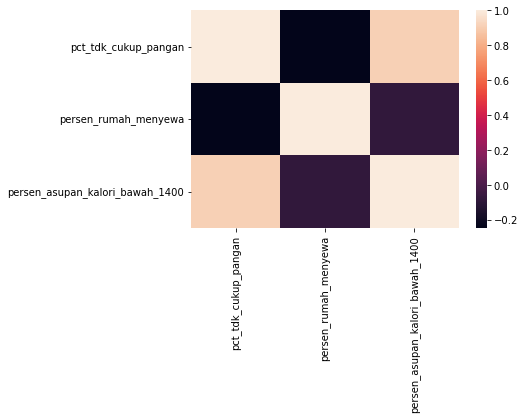

In [4]:
#Melihat hubungan antara kecukupan pangan, kebutuhan kalori, persen rumah menyewa dan melek huruf

corr = data_merge[["pct_tdk_cukup_pangan", "persen_rumah_menyewa", "persen_asupan_kalori_bawah_1400"]].corr()
ax = sns.heatmap(corr)

Berdasarkan heatmap yang ditampilkan diatas, terdapat korelasi antara kecukupan pangan dengan asupan kalori. Hal ini menandakan bahwa ketersedian pangan juga dapat mempengaruhi terhadap asupan gizi. Kebutuhan pangan yang semakin terpenuhi akan membuat gizi juga terpenuhi dengan cukup. Hal ini harus lebih diperhatikan mengingat banyaknya anak yang masih menderita kekurangan gizi, maka pemerintah sebaiknya memastikan masyarakat Indonesia memiliki asupan pangan yang cukup

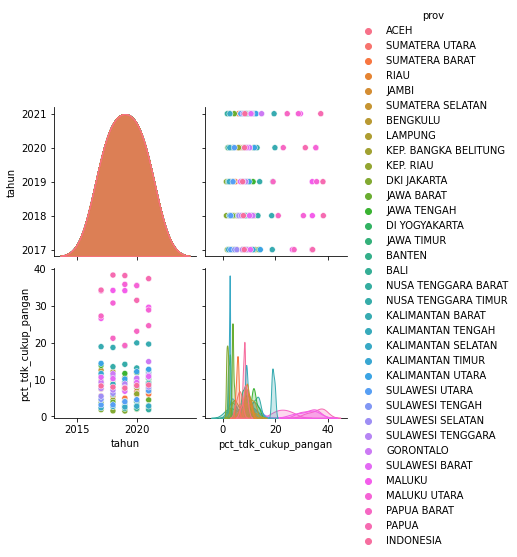

In [5]:
sns.pairplot(data=data_pangan[['tahun','pct_tdk_cukup_pangan','prov']],hue="prov")

In [6]:
rata_pangan = data_pangan.groupby((["prov", "tahun"])).mean().reset_index()

#rata_pangan = data_pangan.groupby(by="tahun").mean().reset_index()

rata_pangan

,prov,tahun,pct_tdk_cukup_pangan
0,ACEH,2017,8.40
1,ACEH,2018,8.68
2,ACEH,2019,9.41
3,ACEH,2020,8.58
4,ACEH,2021,6.90
...,...,...,...
170,SUMATERA UTARA,2017,7.39
171,SUMATERA UTARA,2018,5.75
172,SUMATERA UTARA,2019,4.84
173,SUMATERA UTARA,2020,6.73


# Praproses

In [7]:
data_merge

,tahun,pct_tdk_cukup_pangan,prov,persen_rumah_menyewa,melek_huruf_diatas15,persen_asupan_kalori_bawah_1400
0,2021,6.90,ACEH,6.86,98.24,NaN
1,2021,6.33,SUMATERA UTARA,14.13,99.19,NaN
2,2021,6.02,SUMATERA BARAT,11.37,99.26,NaN
3,2021,10.61,RIAU,11.82,99.2,NaN
4,2021,9.25,JAMBI,5.95,98.08,NaN
...,...,...,...,...,...,...
170,2017,26.57,MALUKU,6.53,99.13,20.99
171,2017,34.05,MALUKU UTARA,5.47,98.68,24.62
172,2017,27.22,PAPUA BARAT,13.10,97.16,23.27
173,2017,34.27,PAPUA,9.02,73.89,24.79


In [8]:
data_merge.isnull().sum()

tahun                               0
pct_tdk_cukup_pangan                0
prov                                0
persen_rumah_menyewa                0
melek_huruf_diatas15                0
persen_asupan_kalori_bawah_1400    70
dtype: int64

terdapat nilai null untuk data asupan kalori, maka data ini akan diisi dengan nilai mediannya

In [9]:
data_merge['persen_asupan_kalori_bawah_1400'].fillna(data_merge['persen_asupan_kalori_bawah_1400'].median(),inplace=True)

data_merge.isnull().sum()

tahun                              0
pct_tdk_cukup_pangan               0
prov                               0
persen_rumah_menyewa               0
melek_huruf_diatas15               0
persen_asupan_kalori_bawah_1400    0
dtype: int64

Sudah tidak ada nilai NULL lagi

In [10]:
data_merge = pd.merge(data_merge, data_ipm, how='left', on=["tahun", "prov"])

data_merge.isnull().sum()

tahun                              0
pct_tdk_cukup_pangan               0
prov                               0
persen_rumah_menyewa               0
melek_huruf_diatas15               0
persen_asupan_kalori_bawah_1400    0
kategori_pmi                       5
dtype: int64

Setelah ditambahkan kategori IPM nya, ternyata ada yang masih bernilai NULL. Maka, untuk data tersebut akan dibuang

In [11]:
data_merge = data_merge.dropna()
data_merge.isnull().sum()

tahun                              0
pct_tdk_cukup_pangan               0
prov                               0
persen_rumah_menyewa               0
melek_huruf_diatas15               0
persen_asupan_kalori_bawah_1400    0
kategori_pmi                       0
dtype: int64

Agar lebih mudah untuk dibaca, nama kolom akan kita ubah 

In [12]:
data_merge.columns = ['tahun','kurang_pangan','prov','sewa_rumah','melek_huruf','asupan_kalori','kategori_pmi']

data_merge

,tahun,kurang_pangan,prov,sewa_rumah,melek_huruf,asupan_kalori,kategori_pmi
0,2021,6.90,ACEH,6.86,98.24,8.51,TINGGI
1,2021,6.33,SUMATERA UTARA,14.13,99.19,8.51,TINGGI
2,2021,6.02,SUMATERA BARAT,11.37,99.26,8.51,TINGGI
3,2021,10.61,RIAU,11.82,99.2,8.51,TINGGI
4,2021,9.25,JAMBI,5.95,98.08,8.51,TINGGI
...,...,...,...,...,...,...,...
169,2017,10.59,SULAWESI BARAT,2.69,92.79,11.24,SEDANG
170,2017,26.57,MALUKU,6.53,99.13,20.99,SEDANG
171,2017,34.05,MALUKU UTARA,5.47,98.68,24.62,SEDANG
172,2017,27.22,PAPUA BARAT,13.10,97.16,23.27,SEDANG


In [13]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 173
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tahun          170 non-null    int64  
 1   kurang_pangan  170 non-null    float64
 2   prov           170 non-null    object 
 3   sewa_rumah     170 non-null    float64
 4   melek_huruf    170 non-null    object 
 5   asupan_kalori  170 non-null    float64
 6   kategori_pmi   170 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 10.6+ KB


tipe datanya akan diubah

In [14]:
data_merge['prov'] = data_merge['prov'].astype("category")
data_merge['melek_huruf'] = data_merge['melek_huruf'].astype("float")
data_merge['kategori_pmi'] = data_merge['kategori_pmi'].astype("category")

data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 173
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tahun          170 non-null    int64   
 1   kurang_pangan  170 non-null    float64 
 2   prov           170 non-null    category
 3   sewa_rumah     170 non-null    float64 
 4   melek_huruf    170 non-null    float64 
 5   asupan_kalori  170 non-null    float64 
 6   kategori_pmi   170 non-null    category
dtypes: category(2), float64(4), int64(1)
memory usage: 9.8 KB


Setelah diubah tipe datanya menjadi sesuai, maka kategori_pmi akan dibuat menjadi code menggunakan label encode

In [15]:
#simpan dulu nama kategorinya, siapa tau dibutuhkan nanti
kategori = data_merge['kategori_pmi'].unique()

kategori

['TINGGI', 'SEDANG', 'SANGAT TINGGI', 'SANGAT RENDAH']
Categories (4, object): ['SANGAT RENDAH', 'SANGAT TINGGI', 'SEDANG', 'TINGGI']

In [16]:
# ubah kategori dengan label encoder

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data_merge['kategori_pmi']=encoder.fit_transform(data_merge['kategori_pmi'])
data_merge

,tahun,kurang_pangan,prov,sewa_rumah,melek_huruf,asupan_kalori,kategori_pmi
0,2021,6.90,ACEH,6.86,98.24,8.51,3
1,2021,6.33,SUMATERA UTARA,14.13,99.19,8.51,3
2,2021,6.02,SUMATERA BARAT,11.37,99.26,8.51,3
3,2021,10.61,RIAU,11.82,99.20,8.51,3
4,2021,9.25,JAMBI,5.95,98.08,8.51,3
...,...,...,...,...,...,...,...
169,2017,10.59,SULAWESI BARAT,2.69,92.79,11.24,2
170,2017,26.57,MALUKU,6.53,99.13,20.99,2
171,2017,34.05,MALUKU UTARA,5.47,98.68,24.62,2
172,2017,27.22,PAPUA BARAT,13.10,97.16,23.27,2


# KLASIFIKASI

In [17]:
#one hot encoding
data_merge = pd.get_dummies(data=data_merge, columns=['prov'])

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_merge['kategori_pmi'])
Y = le.transform(data_merge['kategori_pmi'])

#hapus label kelas dari x
X = data_merge.drop('kategori_pmi',axis=1)

In [19]:
#split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#C:\\Users\\Dicki Fathurohman\\Documents\\UAS-DATMIN
#simpan untuk keperluan prediksi nanti
import pickle
with open('C:\\Users\\Dicki Fathurohman\\Documents\\UAS-DATMIN\\orders_x_train_columns.pickle', 'wb') as fp:
     pickle.dump(X_train.columns, fp)


In [20]:
#random forest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rcv = RandomForestClassifier(n_estimators=50, random_state=123)
rcv.fit(X_train, Y_train)
Y_pred = rcv.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.8235294117647058
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.82      0.69      0.75        13
           3       0.82      0.90      0.86        20

    accuracy                           0.82        34
   macro avg       0.88      0.86      0.87        34
weighted avg       0.82      0.82      0.82        34



In [23]:
kategori

['TINGGI', 'SEDANG', 'SANGAT TINGGI', 'SANGAT RENDAH']
Categories (4, object): ['SANGAT RENDAH', 'SANGAT TINGGI', 'SEDANG', 'TINGGI']